In [1]:
# 25-2
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어있는 target 데이터를 
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다 
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# Iris data 중 virginica라는 종의 petal length(꽃잎 길이)를 X, sepal length(꽃받침의 길이)를 Y로 두고 print
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print(X)
print(Y)

[6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
[6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


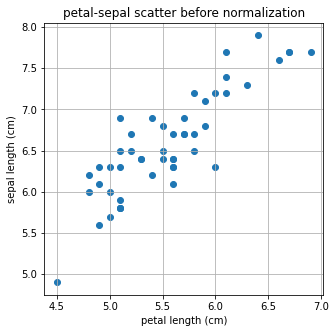

In [3]:
# 산점도를 그려 직관적으로 살펴보기
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

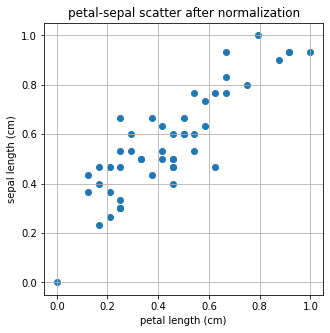

In [4]:
#  0-1로 normlization을 해주는 minmax_scale를 이용해서 산점도 다시 그리기
from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

sklearn.linear_model에 포함된 LinearRegression 모델을 사용하여 X-Y 관계를 선형으로 모델링 해 보기
이 sklearn.linear_model에는 L1, L2 Regression인 Lasso와 Ridge 모델도 함께 포함되어 있으므로, 이들의 차이점을 먼저 직관적으로 이해해 보기

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np 

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다. 
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear Regression의 기울기와 절편을 확인합니다. 
a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

기울기 : 1.00, 절편 : 1.06


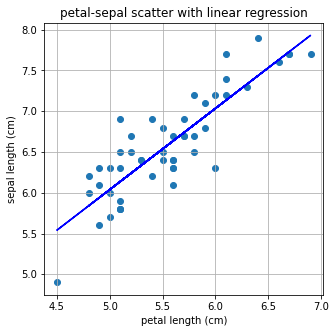

In [6]:
# Linear regression 으로 구한 기울기와 절편을 가지고 일차함수를 만들어 산점도와 함께 그려보기
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

L1, L2 Regularization으로 Regression을 해보겠습니다. 이는 Lasso, Ridge라고 부른다.

먼저 L1 regularization인 Lasso로 문제를 풀어보기

기울기 : 0.00, 절편 : 6.59


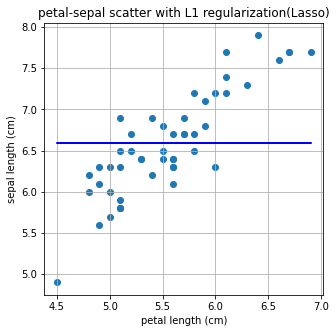

In [7]:
#L1 regularization은 Lasso로 import 합니다.
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b=L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()
# 기울기가 0으로 나옴, Lasso 방법은 제대로 문제를 풀어내지 못하는 것 같다.

기울기 : 0.93, 절편 : 1.41


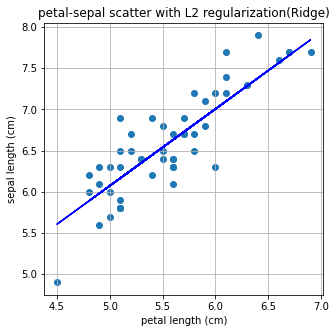

In [8]:
#L2 regularization은 Ridge로 import 합니다.  L2 regularization인 Ridge로 문제를 풀어보고 서로 비교하기
from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X.reshape(-1,1), Y)
a, b = L2.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L2.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

Linear Regression이 L2 Norm과 관련이 있다. 그래서 L2 Regularization을 쓰는 Ridge방법으로는 앞서 Linear Regression과 큰 차이가 없는 결과가 나온다.
왜 L1 Regularization을 쓰는 Lasso에서는 답이 나오지 않았을까요?

In [9]:
# 25-3 L1 Reularization, 저번 시간에 사용해 본 코드의 일부분을 살펴보기
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


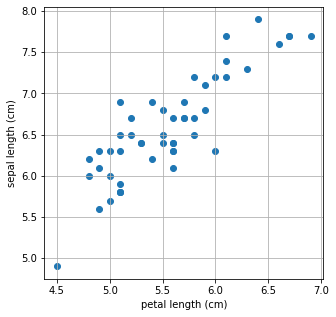

In [10]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

X = np.array(X)
Y = np.array(Y)

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.00, 절편 : 6.59


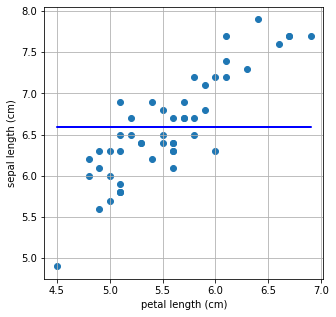

In [11]:
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b = L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

In [12]:
# L1 정칙화를 적용하기에 Iris 데이터는 특성이 총 4개로 컬럼 수가 너무 적으니 wine dataset을 이용, 13개의 특성이 있다.
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

In [13]:
# 데이터 예시 살펴보기
wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [14]:
target_df.head(5)

,Y
0,0
1,0
2,0
3,0
4,0


In [15]:
# Linear regression 으로 문제를 풀고, 그 계수(coefficient)와 절대 오차(mean absolute error), 제곱 오차(mean squared error), 평균 제곱값 오차(root mean squared error)를 출력
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터를 준비하고
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size=0.3, random_state=101)

# 모델을 훈련시킵니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트를 해볼까요?
model.predict(X_test)
pred = model.predict(X_test)

# 테스트 결과는 이렇습니다!
print("result of linear regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient linear regression")
print(model.coef_)

result of linear regression
Mean Absolute Error: 0.25128973939722626
Mean Squared Error: 0.1062458740952556
Mean Root Squared Error: 0.32595379134971814


 coefficient linear regression
[[-8.09017190e-02  4.34817880e-02 -1.18857931e-01  3.65705449e-02
  -4.68014203e-04  1.41423581e-01 -4.54107854e-01 -5.13172664e-01
   9.69318443e-02  5.34311136e-02 -1.27626604e-01 -2.91381844e-01
  -5.72238959e-04]]


In [16]:
# L1 regularization으로 문제를 풀어보기
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 모델을 준비하고 훈련시킵니다.
L1 = Lasso(alpha=0.05)
L1.fit(X_train, y_train)

# 테스트를 해봅시다.
pred = L1.predict(X_test)

# 모델 성능은 얼마나 좋을까요?
print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24233731936122138
Mean Squared Error: 0.0955956894578189
Mean Root Squared Error: 0.3091855259513597


 coefficient of Lasso
[-0.          0.01373795 -0.          0.03065716  0.00154719 -0.
 -0.34143614 -0.          0.          0.06755943 -0.         -0.14558153
 -0.00089635]


<결과분석>
coefficient 부분을 보시면 Linear Regression과 L1 Regularization의 차이가 좀 더 두드러짐을 알 수 있다. 
Linear Regression에서는 모든 컬럼의 가중치를 탐색하여 구하는 반면, L1 Regularization에서는 총 13개 중 7개를 제외한 나머지의 값들이 모두 0임을 확인할 수 있다. 
Error 부분에서는 큰 차이가 없었지만, 우리가 어떤 컬럼이 결과에 영향을 더 크게 미치는지 확실히 확인할 수 있다. 
이러한 경우 다른 문제에서도 error의 차이가 크게 나지 않는다면, 차원 축소와 비슷한 개념으로 변수의 값을 7개만 남겨도 충분히 결과를 예측할 수 있다. 
다만 Linear Regression과 L1, L2 Regularization의 차이 중 하나는 \alphaα라는 하이퍼파라미터(수식에서는 \lambdaλ)가 하나 더 들어간다는 것이고, 그 값에 따라 error에 영향을 미친다는 점입니다.



In [17]:
# 25-4 이전의 같은 문제에서 iteration을 제약조건으로 주며 실험해보겠다. 어디에 나타나는지????/ 아래에 있네. ㅎㅎ
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size= 0.3, random_state=101)
print('=3')


=3


In [18]:
# L1 regularization으로 iteration 횟수를 5회로 두고 문제를 풀어보기
from sklearn.linear_model import Lasso

L1 = Lasso(alpha=0.05, max_iter=5)
L1.fit(X_train, y_train)
pred = L1.predict(X_test)

print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24845768841769436
Mean Squared Error: 0.10262989110341268
Mean Root Squared Error: 0.32035900346862844


 coefficient of Lasso
[-0.          0.         -0.          0.03295564  0.00109495  0.
 -0.4027847   0.          0.          0.06023131 -0.         -0.12001119
 -0.00078971]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.924e+00, tolerance: 7.480e-03
  model = cd_fast.enet_coordinate_descent(


In [19]:
#  L2 regularization도 같은 제약조건을 두고 문제를 풀어보기, iteration 횟수 5회로 두고 실행
from sklearn.linear_model import Ridge

L2 = Ridge(alpha=0.05,max_iter=5)
L2.fit(X_train, y_train)
pred = L2.predict(X_test)

print("result of Ridge")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Ridge")
print(L2.coef_)

result of Ridge
Mean Absolute Error: 0.251146695993643
Mean Squared Error: 0.10568076460795564
Mean Root Squared Error: 0.3250857803841251


 coefficient of Ridge
[[-8.12456257e-02  4.35541496e-02 -1.21661565e-01  3.65979773e-02
  -3.94014013e-04  1.39168707e-01 -4.50691113e-01 -4.87216747e-01
   9.54111059e-02  5.37077039e-02 -1.28602933e-01 -2.89832790e-01
  -5.73136185e-04]]


iteration 값을 5로만 설정해 보아도, L2 Regularization의 문제는 Linear Regression과 같은 값이 나오지만, L1 Regularization에서는 앞 step과 같은 값을 확인할 수는 없다. 심지어 수렴하지 않았다는 경고까지 나오는군요! 이는 아직 다른 조건들을 만족하는 답을 찾지 못하였다는 뜻이다.

정리하면, 
L1 Regularization은 가중치가 적은 벡터에 해당하는 계수를 0으로 보내면서 차원 축소와 비슷한 역할을 하는 것이 특징이며, 
L2 Regularization은 0이 아닌 0에 가깝게 보내지만 제곱 텀이 있기 때문에 L1 Regularization보다는 수렴 속도가 빠르다는 장점이 있다. 
예를 들어, A=[1,1,1,1,1] , B=[5,0,0,0,0] 의 경우 L1-norm은 같지만, L2-norm은 같지 않다. 즉, 제곱 텀에서 결과에 큰 영향을 미치는 값은 더 크게, 결과에 영향이 적은 값들은 더 작게 보내면서 수렴 속도가 빨라지는 것이다.

그러므로, 데이터에 따라 적절한 Regularization 방법을 활용하는 것이 좋습니다.

In [20]:
# 25-5  vector norm : 아래 코드에서 p의 값과 x의 형태를 바꾸어가며 실험
x=np.array([1,10,1,1,1])
p=5
norm_x=np.linalg.norm(x, ord=p)
making_norm = (sum(x**p))**(1/p)  # 실제로 계산하면 값이 나오네(100004^1/5)
print("result of numpy package norm function : %0.5f "%norm_x) 
print("result of making norm : %0.5f "%making_norm)

result of numpy package norm function : 10.00008 
result of making norm : 10.00008 


In [21]:
# p가 우리가 생각하는 자연수가 아닌 경우에는 어떻게 될까? p=∞ 인 Infinity norm의 경우는 가장 큰 숫자를 출력합니다.

norm_x=np.linalg.norm(x, ord=np.inf)
print("result of infinite norm : %0.5f "%norm_x)

result of infinite norm : 10.00000 


In [22]:
# matrix norm : p=1인 경우에는 컬럼의 합이 가장 큰 값이 출력되고, p=∞인 경우에는 로우의 합이 가장 큰 값이 출력
A=np.array([[1,2,3],[1,2,3],[4,6,8]])
inf_norm_A=np.linalg.norm(A, ord=np.inf) # p=∞인 경우에는 로우의 합이 가장 큰 값이 출력(6, 6, 18 중 18이 가장 큰 값)
print("result inf norm of A :", inf_norm_A)  #  p=1인 경우에는 컬럼의 합이 가장 큰 값이 출력 (6, 10, 14 중 14가 가장 크다)
one_norm_A=np.linalg.norm(A, ord=1)
print("result one norm of A :", one_norm_A)

result inf norm of A : 18.0
result one norm of A : 14.0


DROP OUT 실습하기
fashion mnist 라는 데이터 셋을 불러와서 학습을 시키도록 하겠다. 
총 10개의 클래스로 이루어져 있다. 이 데이터셋은 간단한 편이기도 하여 5 epoch에서도 어느 정도 결과가 나오게 된다.
드롭아웃 레이어를 중간에 추가하여 확률을 1에 가깝게 주면 어떻게 되는지 살펴보도록 하겠다.

In [23]:
# 25-6 실습 (not overfitting)
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


In [24]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [25]:
# drop out = 0.9
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 아래의 실습과 같습니다.
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 1.4107 - accuracy: 0.4466
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1558 - accuracy: 0.5289
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1003 - accuracy: 0.5456
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0825 - accuracy: 0.5505
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0642 - accuracy: 0.5623


In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # 이번에는 dropout layer가 없습니다. 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4991 - accuracy: 0.8248
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3763 - accuracy: 0.8641
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3389 - accuracy: 0.8774
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3154 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2955 - accuracy: 0.8910


현재 이 데이터 셋은 학습이 잘 되는 데이터 셋으로, fully connected layer에서도 결과가 잘 나옴을 확인할 수 있다. 
일부러 중간에 Dropout layer를 추가하여 0.9의 확률 값을 주니 학습이 안 됨을 확인할 수 있다.

아래 부분은
overfitting이 되는지 확인해 보려면 train set과 validation set의 loss function을 그려보는 것이 가장 첫 번째 시도이다.
우리는 위의 데이터를 이제 train:valid=99:1로 split 한 뒤에 loss function의 값을 그려보고, overfitting 이 나는 fully connected layer를 만들어보도록 합시다. overfitting이 되게 하기 위해 의도적으로 train set을 99%로 늘리고 validation set을 줄였다.


In [27]:
# 실습 (over fitting)
X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.01, random_state=101)
X_train = X_train / 255.0
X_valid = X_valid / 255.0

#Dense layer만으로 만들어 낸 classification 모델입니다.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 1s 5ms/step - loss: 2.0551 - accuracy: 0.5557 - val_loss: 1.6516 - val_accuracy: 0.5783
Epoch 2/200
117/117 [==============================] - 0s 4ms/step - loss: 1.4076 - accuracy: 0.6172 - val_loss: 1.1809 - val_accuracy: 0.6517
Epoch 3/200
117/117 [==============================] - 0s 4ms/step - loss: 1.0784 - accuracy: 0.6753 - val_loss: 0.9582 - val_accuracy: 0.7283
Epoch 4/200
117/117 [==============================] - 0s 4ms/step - loss: 0.8989 - accuracy: 0.7189 - val_loss: 0.8255 - val_accuracy: 0.7467
Epoch 5/200
117/117 [==============================] - 0s 4ms/step - loss: 0.7920 - accuracy: 0.7339 - val_loss: 0.7391 - val_accuracy: 0.7633
Epoch 6/200
117/117 [==============================] - 0s 4ms/step - loss: 0.7285 - accuracy: 0.7459 - val_loss: 0.6919 - val_accuracy: 0.7767
Epoch 7/200
117/117 [==============================] - 0s 4ms/step - loss: 0.6854 - accuracy: 0.7572 - val_loss: 0.6582 - val_accuracy: 0.7800

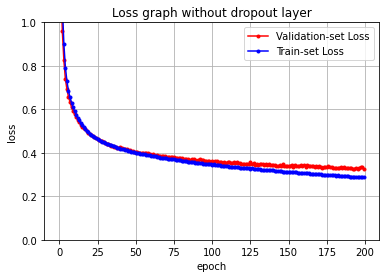

In [28]:
# loss 값을 plot 해보겠습니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

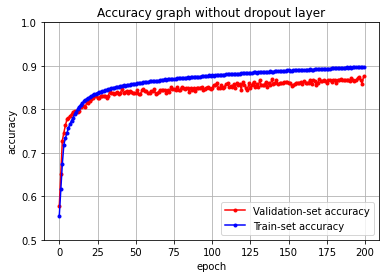

In [29]:
# accuracy 값을 plot 해보겠습니다.
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph without dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

위의 droupout layer가 없는 fully connected layer에서 200번 정도의 학습을 하니 train set의 accuracy는 올라가고, loss는 점점 떨어졌다. 
그러나 validation set의 accuracy와 loss는 어느 정도 값에서 수렴함을 볼 수 있었다.
이렇게 오버피팅을 만든 환경에서 Dropout layer를 추가한 뒤 나머지 환경은 같게 한 실험을 살펴보도록 하겠다.

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다. 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 1s 5ms/step - loss: 2.0639 - accuracy: 0.4892 - val_loss: 1.6733 - val_accuracy: 0.5800
Epoch 2/200
117/117 [==============================] - 0s 4ms/step - loss: 1.4525 - accuracy: 0.5656 - val_loss: 1.2136 - val_accuracy: 0.6667
Epoch 3/200
117/117 [==============================] - 0s 4ms/step - loss: 1.1518 - accuracy: 0.6246 - val_loss: 1.0011 - val_accuracy: 0.7100
Epoch 4/200
117/117 [==============================] - 0s 4ms/step - loss: 0.9849 - accuracy: 0.6723 - val_loss: 0.8697 - val_accuracy: 0.7383
Epoch 5/200
117/117 [==============================] - 0s 4ms/step - loss: 0.8786 - accuracy: 0.7017 - val_loss: 0.7869 - val_accuracy: 0.7567
Epoch 6/200
117/117 [==============================] - 0s 4ms/step - loss: 0.8117 - accuracy: 0.7184 - val_loss: 0.7290 - val_accuracy: 0.7667
Epoch 7/200
117/117 [==============================] - 0s 4ms/step - loss: 0.7655 - accuracy: 0.7288 - val_loss: 0.6917 - val_accuracy: 0.7733

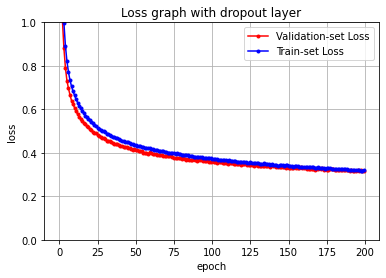

In [32]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

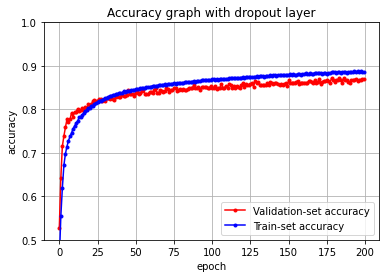

In [33]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

좋은 데이터를 가지고 오버피팅을 만드는 환경이 조금 어렵긴 했지만, Dropout layer 하나만으로도 오버피팅을 막고, 두 데이터 셋이 정확도도 비슷하게 나옴을 확인하였습니다. 사실 더 복잡한 네트워크나, 더 어려운 데이터의 경우에는 이러한 오버피팅이 더 자주 있는 일이므로, Dropout layer를 추가하는 경우가 많습니다. 하지만 이 또한 확률 값이 파라미터로 들어가므로, 어떠한 값을 선택하느냐는 데이터와 네트워크에 따라 달린 일이다.

# 25-7 실습
아무것도 하지 않은 fully connected layer와 Batch Normalization layer를 추가한 두 실험을 비교하고자 한다. 
중점적으로 봐야 할 내용은 정확도 비교와 속도의 차이이다.

In [34]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


In [35]:
# 이미지 데이터인 fashion mnist 데이터 셋을 불러오기. 총 10개의 클래스로 나누어져 있다.
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [36]:
# 이미지를 트레이닝하기 위해서 train / valid 를 7:3으로 분리하고, Dense layer 를 쌓아서 트레이닝 해보기
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 27ms/step - loss: 1.2373 - accuracy: 0.6062 - val_loss: 0.7709 - val_accuracy: 0.7249
Epoch 2/20
21/21 [==============================] - 0s 7ms/step - loss: 0.6753 - accuracy: 0.7679 - val_loss: 0.6097 - val_accuracy: 0.7953
Epoch 3/20
21/21 [==============================] - 0s 7ms/step - loss: 0.5647 - accuracy: 0.8088 - val_loss: 0.5372 - val_accuracy: 0.8218
Epoch 4/20
21/21 [==============================] - 0s 7ms/step - loss: 0.5112 - accuracy: 0.8298 - val_loss: 0.5000 - val_accuracy: 0.8331
Epoch 5/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4777 - accuracy: 0.8415 - val_loss: 0.4754 - val_accuracy: 0.8396
Epoch 6/20
21/21 [==============================] - 0s 6ms/step - loss: 0.4547 - accuracy: 0.8479 - val_loss: 0.4553 - val_accuracy: 0.8458
Epoch 7/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4367 - accuracy: 0.8525 - val_loss: 0.4439 - val_accuracy: 0.8466
Epoch 8/20
21/21 [=

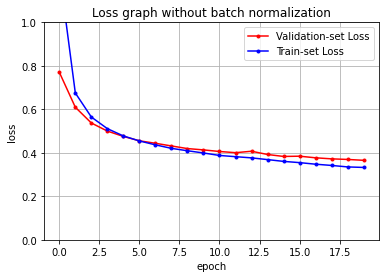

In [37]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

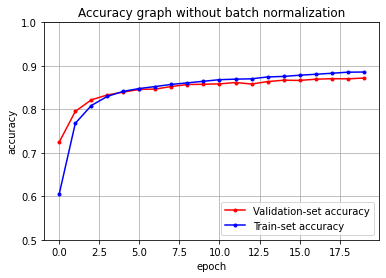

In [38]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1)
plt.title('Accuracy graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [39]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    #여기에 batchnormalization layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다.
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 18ms/step - loss: 0.9533 - accuracy: 0.6744 - val_loss: 1.0318 - val_accuracy: 0.6783
Epoch 2/20
21/21 [==============================] - 0s 7ms/step - loss: 0.5155 - accuracy: 0.8225 - val_loss: 0.8243 - val_accuracy: 0.7636
Epoch 3/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4486 - accuracy: 0.8466 - val_loss: 0.7376 - val_accuracy: 0.8004
Epoch 4/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4108 - accuracy: 0.8578 - val_loss: 0.6715 - val_accuracy: 0.8301
Epoch 5/20
21/21 [==============================] - 0s 7ms/step - loss: 0.3847 - accuracy: 0.8668 - val_loss: 0.6126 - val_accuracy: 0.8434
Epoch 6/20
21/21 [==============================] - 0s 7ms/step - loss: 0.3658 - accuracy: 0.8723 - val_loss: 0.5744 - val_accuracy: 0.8501
Epoch 7/20
21/21 [==============================] - 0s 7ms/step - loss: 0.3474 - accuracy: 0.8796 - val_loss: 0.5420 - val_accuracy: 0.8497
Epoch 8/20
21/21 [=

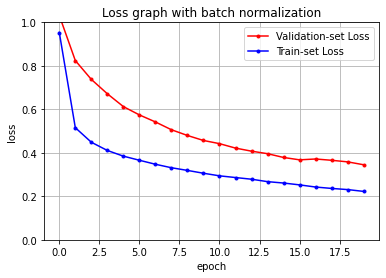

In [40]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

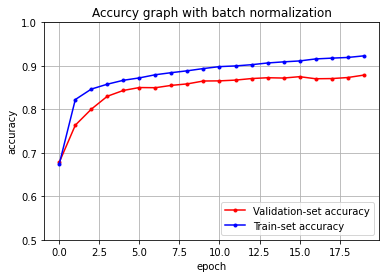

In [41]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accurcy graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

기존의 fully connected layer도 낮지 않은 결과를 가져오지만, Batch Normalization을 추가하니 좀 더 빠르게 정확도 상승이 있음을 확인할 수 있다.
또한 loss 함수의 감소도 더 빨라짐을 확인할 수 있었다. 
즉 Batch Normalization으로 인해 이미지가 정규화되면서 좀 더 고른 분포를 가지기도 하며, 앞서 설명해 드린 ϵ 부분으로 인해 안정적인 학습이 가능해진다.